In [293]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [306]:
test1 = pd.read_csv('C:\\Users\\dell\\Desktop\\Project Competitions\\Anlayticsvidhya\\TEST_FINAL.csv',parse_dates = True)
train1 = pd.read_csv('C:\\Users\\dell\\Desktop\\Project Competitions\\Anlayticsvidhya\\TRAIN.csv')


In [297]:
test1.shape, train1.shape


((22265, 8), (188340, 10))

In [298]:
test1[test1['Store_id'] == 3]
# we have 61 rows of each store id.. 

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
328,T1188669,3,S4,L2,R1,2019-06-01,0,No
713,T1189054,3,S4,L2,R1,2019-06-02,0,No
895,T1189236,3,S4,L2,R1,2019-06-03,0,No
1217,T1189558,3,S4,L2,R1,2019-06-04,0,No
1510,T1189851,3,S4,L2,R1,2019-06-05,1,No
...,...,...,...,...,...,...,...,...
20557,T1208898,3,S4,L2,R1,2019-07-27,0,Yes
21046,T1209387,3,S4,L2,R1,2019-07-28,0,Yes
21170,T1209511,3,S4,L2,R1,2019-07-29,0,Yes
21839,T1210180,3,S4,L2,R1,2019-07-30,0,No


In [299]:
train1[train1['Store_id'] == 3]
# we have 516 rows of each store id..

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
127,T1000128,3,S4,L2,R1,2018-01-01,1,Yes,72,57288.00
511,T1000512,3,S4,L2,R1,2018-01-02,0,Yes,87,58929.00
759,T1000760,3,S4,L2,R1,2018-01-03,0,Yes,106,69603.00
1447,T1001448,3,S4,L2,R1,2018-01-04,0,Yes,93,59721.00
1814,T1001815,3,S4,L2,R1,2018-01-05,0,Yes,107,71355.00
...,...,...,...,...,...,...,...,...,...,...
186819,T1186820,3,S4,L2,R1,2019-05-27,0,Yes,121,69930.00
187006,T1187007,3,S4,L2,R1,2019-05-28,0,Yes,124,72540.00
187248,T1187249,3,S4,L2,R1,2019-05-29,0,Yes,128,76428.00
187767,T1187768,3,S4,L2,R1,2019-05-30,0,Yes,126,78135.00


In [307]:
train1[train1['Sales'] == 0]

# we have below sales column as zero.. so, imputing them with simply one, to avoid errors..

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
23867,T1023868,311,S4,L2,R2,2018-03-07,0,No,0,0.0
38143,T1038144,222,S4,L2,R2,2018-04-15,1,No,0,0.0
90458,T1090459,233,S1,L3,R3,2018-09-05,0,No,0,0.0
97301,T1097302,271,S1,L3,R2,2018-09-24,0,No,0,0.0
97480,T1097481,271,S1,L3,R2,2018-09-25,0,No,0,0.0
99489,T1099490,12,S1,L3,R2,2018-09-30,0,No,0,0.0
99904,T1099905,12,S1,L3,R2,2018-10-01,0,No,0,0.0
100215,T1100216,12,S1,L3,R2,2018-10-02,1,No,0,0.0
112564,T1112565,39,S4,L1,R1,2018-11-05,0,No,0,0.0
112853,T1112854,39,S4,L1,R1,2018-11-06,1,No,0,0.0


In [308]:
#train1['Sales'] = np.where(train1['Sales'] == 0,1,train1['Sales'])
train1.Store_id.nunique(), test1.Store_id.nunique()

(365, 365)

In [309]:
# dropping ID and converting date to DateTime

train = train1.drop(['ID', '#Order'], axis =1)
test = test1.drop(['ID'], axis =1 )

test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [310]:
# adding new features related to date

def addatefea(x):
    x['month'] = x['Date'].dt.month
    x['year'] = x['Date'].dt.year
    #x['weekofyear']= x['Date'].dt.isocalendar().week
    x['day'] = x['Date'].dt.day
    return x
    
train = addatefea(train)
test = addatefea(test)

In [311]:
test.tail(3)

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,month,year,day
22262,185,S1,L1,R3,2019-07-31,0,Yes,7,2019,31
22263,69,S1,L1,R4,2019-07-31,0,No,7,2019,31
22264,365,S2,L1,R2,2019-07-31,0,No,7,2019,31


In [312]:
train.head(3)

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,month,year,day
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,1,2018,1
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12,1,2018,1
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20,1,2018,1


In [314]:
train.nunique(),test.nunique()

(Store_id           365
 Store_Type           4
 Location_Type        5
 Region_Code          4
 Date               516
 Holiday              2
 Discount             2
 Sales            47422
 month               12
 year                 2
 day                 31
 dtype: int64,
 Store_id         365
 Store_Type         4
 Location_Type      5
 Region_Code        4
 Date              61
 Holiday            2
 Discount           2
 month              2
 year               1
 day               31
 dtype: int64)

In [315]:
train.loc[train.duplicated(), :]

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,month,year,day


In [317]:
total = pd.concat([train,test], axis =0)
total

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,month,year,day
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,1,2018,1
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12,1,2018,1
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20,1,2018,1
3,251,S2,L3,R1,2018-01-01,1,Yes,19715.16,1,2018,1
4,250,S2,L3,R4,2018-01-01,1,Yes,45614.52,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...
22260,186,S2,L5,R2,2019-07-31,0,No,NaN,7,2019,31
22261,11,S4,L2,R1,2019-07-31,0,No,NaN,7,2019,31
22262,185,S1,L1,R3,2019-07-31,0,Yes,NaN,7,2019,31
22263,69,S1,L1,R4,2019-07-31,0,No,NaN,7,2019,31


In [276]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,QuantileTransformer

## since the dates here implicate the ordinal variable, encoding them 

total2 = total.copy()
total2 = pd.get_dummies(total2)
#encoder = LabelEncoder()
#total[['Discount','store_info','year','month']] = total[['Discount','store_info','year','month']].apply(encoder.fit_transform)

scaler = StandardScaler()
total2[['Store_id','month','year','day']]= pd.DataFrame(scaler.fit_transform(total2[['Store_id','month','year','day']]))

In [319]:
total.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,month,year,day
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,1,2018,1
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12,1,2018,1
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20,1,2018,1
3,251,S2,L3,R1,2018-01-01,1,Yes,19715.16,1,2018,1
4,250,S2,L3,R4,2018-01-01,1,Yes,45614.52,1,2018,1


## Extracting lag features from the previous data 
#### train data

In [320]:
train_dat = total.iloc[:len(train),].copy()
train_dat['order'] = train1['#Order'].values

In [321]:
traindatasort = train_dat[['Date','Store_id','Sales','order']]

traindatasort.set_index(['Date','Store_id'], inplace= True)
traindatasort.head()

Sales  order
Date       Store_id                 
2018-01-01 1          7011.84      9
           253       51789.12     60
           252       36868.20     42
           251       19715.16     23
           250       45614.52     62

In [322]:
lag_features = traindatasort.unstack().shift(61)
lag_features = lag_features.iloc[61:,]
lag_features = lag_features.droplevel(level =0, axis =1)
lag_features

Store_id,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-03,7011.84,18137.52,57288.0,53615.52,36316.08,37234.26,53544.48,49684.68,68205.15,55628.1,...,23.0,49.0,85.0,55.0,28.0,26.0,37.0,42.0,43.0,32.0
2018-03-04,42369.00,62976.00,58929.0,43194.00,59661.00,58761.00,52926.00,88677.00,45108.00,74220.0,...,67.0,106.0,75.0,46.0,45.0,57.0,57.0,71.0,46.0,43.0
2018-03-05,50037.00,54057.00,69603.0,40998.00,52200.00,57786.00,55458.00,77328.00,47349.00,67569.0,...,70.0,113.0,66.0,45.0,39.0,53.0,54.0,74.0,50.0,40.0
2018-03-06,44397.00,62379.00,59721.0,44787.00,51150.00,70074.00,54693.00,78192.00,50133.00,72792.0,...,69.0,117.0,76.0,51.0,48.0,63.0,58.0,79.0,54.0,49.0
2018-03-07,47604.00,57780.00,71355.0,50814.00,60693.00,63438.00,69300.00,84489.00,58548.00,83541.0,...,73.0,139.0,81.0,55.0,54.0,64.0,65.0,85.0,62.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,46194.00,29874.00,63642.0,20931.00,42729.00,57600.00,48303.00,42045.00,28158.00,44157.0,...,75.0,117.0,66.0,51.0,46.0,55.0,58.0,93.0,32.0,24.0
2019-05-28,41238.00,48651.00,70611.0,40149.00,46176.00,68637.00,59658.00,47814.00,21903.00,60441.0,...,81.0,127.0,56.0,41.0,41.0,59.0,65.0,56.0,44.0,50.0
2019-05-29,45846.00,35397.00,82989.0,29913.00,57015.00,20121.00,32112.00,54006.00,20856.00,42714.0,...,46.0,118.0,67.0,43.0,36.0,38.0,69.0,61.0,43.0,47.0


In [323]:
sales_lag = lag_features.iloc[:,:365]
sales_lag

Store_id,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-03,7011.84,18137.52,57288.0,53615.52,36316.08,37234.26,53544.48,49684.68,68205.15,55628.1,...,20410.2,33680.01,59517.6,43514.28,25680.27,20533.5,27770.4,29676.24,29538.0,25521.75
2018-03-04,42369.00,62976.00,58929.0,43194.00,59661.00,58761.00,52926.00,88677.00,45108.00,74220.0,...,44121.0,72759.00,58503.0,42894.00,38460.00,43122.0,41466.0,56061.00,37257.0,35328.00
2018-03-05,50037.00,54057.00,69603.0,40998.00,52200.00,57786.00,55458.00,77328.00,47349.00,67569.0,...,43626.0,75762.00,51432.0,41592.00,33873.00,40266.0,40170.0,57270.00,41034.0,32709.00
2018-03-06,44397.00,62379.00,59721.0,44787.00,51150.00,70074.00,54693.00,78192.00,50133.00,72792.0,...,44775.0,78873.00,57888.0,48186.00,40164.00,44988.0,43323.0,63987.00,43581.0,42906.00
2018-03-07,47604.00,57780.00,71355.0,50814.00,60693.00,63438.00,69300.00,84489.00,58548.00,83541.0,...,50319.0,98574.00,64113.0,53493.00,48579.00,50250.0,49563.0,72252.00,52344.0,47184.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,46194.00,29874.00,63642.0,20931.00,42729.00,57600.00,48303.00,42045.00,28158.00,44157.0,...,40323.0,64710.00,40953.0,38652.00,30885.00,32139.0,34119.0,61356.00,19764.0,17544.00
2019-05-28,41238.00,48651.00,70611.0,40149.00,46176.00,68637.00,59658.00,47814.00,21903.00,60441.0,...,46605.0,72258.00,32754.0,28911.00,27828.00,35340.0,39201.0,30933.00,24762.0,31146.00
2019-05-29,45846.00,35397.00,82989.0,29913.00,57015.00,20121.00,32112.00,54006.00,20856.00,42714.0,...,22419.0,69837.00,39156.0,31833.00,23706.00,20910.0,43740.0,33396.00,26010.0,28377.00


In [324]:
orders_lag = lag_features.iloc[:,365:]
orders_lag.shape

(455, 365)

In [325]:
for i in range(1,366):
    globals()[f"store{i}"] = train_dat[(train_dat['Store_id'] == i) & (train_dat['Date'] >= '2018-03-03')]
    for x in range(0,365):
        globals()[f"store{i}"]['orders_lag'] = orders_lag.iloc[:,x].values
        globals()[f"store{i}"]['sales_lag'] = sales_lag.iloc[:,x].values

totaltrain = pd.concat(globals()[f"store{i}"] for i in range(1,366))

In [326]:
totaltrain1 = totaltrain.drop(['Date','order'], axis = 1)
totaltrain1

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,month,year,day,orders_lag,sales_lag
22332,1,S1,L3,R1,0,Yes,51810.00,3,2018,3,32.0,25521.75
22951,1,S1,L3,R1,0,Yes,44949.00,3,2018,4,43.0,35328.00
23129,1,S1,L3,R1,0,Yes,46644.00,3,2018,5,40.0,32709.00
23694,1,S1,L3,R1,0,No,18603.00,3,2018,6,49.0,42906.00
23791,1,S1,L3,R1,0,No,33639.00,3,2018,7,51.0,47184.00
...,...,...,...,...,...,...,...,...,...,...,...,...
186722,365,S2,L1,R2,0,Yes,39993.00,5,2019,27,24.0,17544.00
186986,365,S2,L1,R2,0,Yes,54132.00,5,2019,28,50.0,31146.00
187479,365,S2,L1,R2,0,No,22692.00,5,2019,29,47.0,28377.00
187617,365,S2,L1,R2,0,No,31671.00,5,2019,30,50.0,31428.00


In [328]:
scaler = QuantileTransformer()

totaltrain1[['Store_id','orders_lag','sales_lag','month','day']]= scaler.fit_transform(totaltrain1[['Store_id','orders_lag','sales_lag','month','day']])
totaltrain1

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,month,year,day,orders_lag,sales_lag
22332,0.0,S1,L3,R1,0,Yes,51810.00,0.129129,2018,0.079079,0.179680,0.321321
22951,0.0,S1,L3,R1,0,Yes,44949.00,0.129129,2018,0.096597,0.452452,0.724725
23129,0.0,S1,L3,R1,0,Yes,46644.00,0.129129,2018,0.144144,0.344845,0.636136
23694,0.0,S1,L3,R1,0,No,18603.00,0.129129,2018,0.177177,0.680180,0.904404
23791,0.0,S1,L3,R1,0,No,33639.00,0.129129,2018,0.206707,0.742743,0.939439
...,...,...,...,...,...,...,...,...,...,...,...,...
186722,1.0,S2,L1,R2,0,Yes,39993.00,0.394394,2019,0.869870,0.084585,0.094595
186986,1.0,S2,L1,R2,0,Yes,54132.00,0.394394,2019,0.902903,0.706707,0.581081
187479,1.0,S2,L1,R2,0,No,22692.00,0.394394,2019,0.934935,0.612112,0.462963
187617,1.0,S2,L1,R2,0,No,31671.00,0.394394,2019,0.965465,0.706707,0.592092


Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
Sales            0
month            0
year             0
day              0
orders_lag       0
sales_lag        0
dtype: int64

<AxesSubplot:xlabel='orders_lag'>

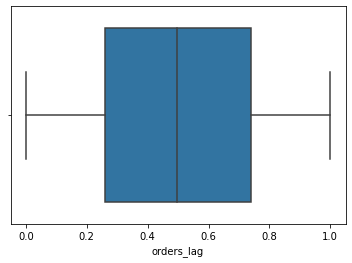

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(totaltrain1['orders_lag'])

<AxesSubplot:xlabel='sales_lag'>

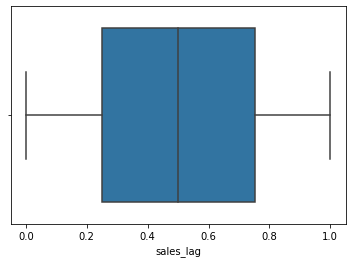

In [238]:
 sns.boxplot(totaltrain1['sales_lag'])

In [330]:
totaltrain1.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,month,year,day,orders_lag,sales_lag
22332,0.0,S1,L3,R1,0,Yes,51810.0,0.129129,2018,0.079079,0.179680,0.321321
22951,0.0,S1,L3,R1,0,Yes,44949.0,0.129129,2018,0.096597,0.452452,0.724725
23129,0.0,S1,L3,R1,0,Yes,46644.0,0.129129,2018,0.144144,0.344845,0.636136
23694,0.0,S1,L3,R1,0,No,18603.0,0.129129,2018,0.177177,0.680180,0.904404
23791,0.0,S1,L3,R1,0,No,33639.0,0.129129,2018,0.206707,0.742743,0.939439


In [280]:
from sklearn.model_selection import train_test_split

totaltrain1['year'] = totaltrain1['year'].astype('str')

totaltrain2 = totaltrain1.copy()

#totaltrain1[['Store_id','day']] = total[['Store_id','day']].apply(encoder.fit_transform)
#totaltrain2 = pd.get_dummies(totaltrain2)

#x = totaltrain2.drop(['Sales'],axis =1)
#y = totaltrain2['Sales']

x1 = totaltrain2.drop(['Sales'],axis =1)
y1 = totaltrain2['Sales']

#x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state= 22)

x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.3, random_state= 22)

In [281]:
x1_train

,Store_id,Holiday,Discount,month,year,day,store_info,orders_lag,sales_lag
64420,0.794795,0,No,0.563564,2018,0.835836,S1L1R3,0.312312,0.251752
169848,0.992993,0,No,0.328328,2019,0.341341,S1L1R2,0.790290,0.612112
111866,0.649650,0,No,0.898398,2018,0.078078,S2L3R3,0.450951,0.706206
32904,0.515015,1,Yes,0.328328,2018,0.000000,S3L2R1,0.084585,0.077578
139948,0.730731,0,No,0.000000,2019,0.586587,S1L1R4,0.166166,0.144144
...,...,...,...,...,...,...,...,...,...
37353,0.128629,0,No,0.328328,2018,0.407407,S4L2R2,0.122122,0.112613
39159,0.727728,0,No,0.328328,2018,0.570070,S2L4R2,0.419419,0.372873
154633,0.150150,0,Yes,0.099600,2019,0.901902,S1L1R2,0.961461,0.989990
138300,0.979479,1,Yes,0.000000,2019,0.439940,S3L1R1,0.810811,0.812312


In [127]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
import xgboost as xgb
import lightgbm as lgb

from statsmodels.api import OLS

def model_pred(model):
    mdl = model()
    mdl.fit(x_train,y_train)
    y_pred = mdl.predict(x_test)
    print('accuracy on trainset for {} is'.format(mdl), mdl.score(x_train,y_train))
    print('accuracy on testset for {} is'.format(mdl), mdl.score(x_test,y_test))
    print('rsquare is ',r2_score(y_pred,y_test))
    print('mean_absolute_erroris', mean_absolute_error(y_pred,y_test))


In [128]:
import statsmodels.api as sm

X_train_Sm= sm.add_constant(x_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     512.2
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:49:35   Log-Likelihood:            -1.2487e+06
No. Observations:              116252   AIC:                         2.498e+06
Df Residuals:                  115851   BIC:                         2.502e+06
Df Model:                         400                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.735e+04    107.360    254.749   

In [129]:
model_pred(RandomForestRegressor)

accuracy on trainset for RandomForestRegressor() is 0.9705819903074289
accuracy on testset for RandomForestRegressor() is 0.7868692294620867
rsquare is  0.7353452236199446
mean_absolute_erroris 5736.379094966181


In [130]:
from xgboost import XGBRegressor

model_pred(XGBRegressor)

accuracy on trainset for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is 0.8040140794432526
accuracy on testset for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
     

In [262]:
x1_train

,Store_id,Holiday,Discount,month,year,day,store_info,orders_lag,sales_lag
64420,290,0,No,0.562563,2018,0.837337,S1L1R3,0.313313,0.252753
169848,363,0,No,0.328328,2019,0.342342,S1L1R2,0.789790,0.611612
111866,237,0,No,0.899900,2018,0.078078,S2L3R3,0.451952,0.704204
32904,188,1,Yes,0.328328,2018,0.000000,S3L2R1,0.084084,0.078078
139948,266,0,No,0.000000,2019,0.606607,S1L1R4,0.166166,0.143644
...,...,...,...,...,...,...,...,...,...
37353,47,0,No,0.328328,2018,0.407908,S4L2R2,0.120621,0.113614
39159,265,0,No,0.328328,2018,0.573574,S2L4R2,0.419920,0.371872
154633,55,0,Yes,0.098599,2019,0.902402,S1L1R2,0.961461,0.989990
138300,358,1,Yes,0.000000,2019,0.440440,S3L1R1,0.811311,0.810811


In [264]:
test_dat = total.iloc[len(train):,:]
test_dat.drop(['Date','Sales'], inplace= True, axis =1)

In [265]:
 test_dat[test_dat['Store_id'] == 1]

,Store_id,Holiday,Discount,month,year,day,store_info
310,1,0,No,6,2019,1,S1L3R1
709,1,0,No,6,2019,2,S1L3R1
996,1,0,No,6,2019,3,S1L3R1
1291,1,0,No,6,2019,4,S1L3R1
1796,1,1,No,6,2019,5,S1L3R1
...,...,...,...,...,...,...,...
20746,1,0,Yes,7,2019,27,S1L3R1
21166,1,0,Yes,7,2019,28,S1L3R1
21417,1,0,Yes,7,2019,29,S1L3R1
21623,1,0,No,7,2019,30,S1L3R1


In [247]:
for i in range(1,366):
    globals()[f"storetest{i}"] = test_dat[test_dat['Store_id'] == i]
    for x in range(0,365):
        globals()[f"storetest{i}"]['orders_lag'] = globals()[f"store{i}"].iloc[394:,10].values
        globals()[f"storetest{i}"]['sales_lag'] = globals()[f"store{i}"].iloc[394:,11].values
    

In [286]:
totaltest = pd.concat(globals()[f"storetest{i}"] for i in range(1,366))
totaltest[['Store_id','orders_lag','sales_lag','month','day']] = scaler.fit_transform(totaltest[['Store_id','orders_lag','sales_lag','month','day']])

In [287]:
totaltest.head()

,Store_id,Holiday,Discount,month,year,day,store_info,orders_lag,sales_lag
310,0.0,0,No,0.0,2019,0.000000,S1L3R1,0.287287,0.303303
709,0.0,0,No,0.0,2019,0.049049,S1L3R1,0.606607,0.598098
996,0.0,0,No,0.0,2019,0.082082,S1L3R1,0.074074,0.139640
1291,0.0,0,No,0.0,2019,0.114615,S1L3R1,0.909910,0.909910
1796,0.0,1,No,0.0,2019,0.147648,S1L3R1,0.778779,0.844344


In [288]:
totest = totaltest.sort_index(ascending=True)
totest

,Store_id,Holiday,Discount,month,year,day,store_info,orders_lag,sales_lag
0,0.467467,0,No,0.0,2019,0.0,S4L2R3,0.287287,0.303303
1,0.469970,0,No,0.0,2019,0.0,S1L1R1,0.287287,0.303303
2,0.472472,0,No,0.0,2019,0.0,S4L2R1,0.287287,0.303303
3,0.475475,0,No,0.0,2019,0.0,S1L1R4,0.287287,0.303303
4,0.464464,0,No,0.0,2019,0.0,S1L1R2,0.287287,0.303303
...,...,...,...,...,...,...,...,...,...
22260,0.508509,0,No,1.0,2019,1.0,S2L5R2,0.704705,0.582082
22261,0.029029,0,No,1.0,2019,1.0,S4L2R1,0.704705,0.582082
22262,0.505506,0,Yes,1.0,2019,1.0,S1L1R3,0.704705,0.582082
22263,0.187688,0,No,1.0,2019,1.0,S1L1R4,0.704705,0.582082


In [306]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(totest)

In [307]:
 y = pd.DataFrame(y_pred)


In [310]:
y.to_csv('pred1.csv')

In [284]:
from catboost import CatBoostRegressor

cfi = ['Discount','year','store_info']

model = CatBoostRegressor(
    n_estimators = 200,
    loss_function = 'MAE',
    eval_metric = 'RMSE',
    cat_features = cfi )

model.fit( x1_train, y1_train, use_best_model=True, eval_set=(x1_test,y1_test),silent=True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [292]:
y_cat = model.predict(totest)
y_c = pd.DataFrame(y_cat)

y_c.to_csv('y_C.csv')